Installing the libraries

In [ ]:
import numpy as np
from PIL import Image

In [ ]:
!pip install diffusers
!pip install transformers
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 4.5 MB/s eta 0:00:00


In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import requests
from PIL import Image
from io import BytesIO

In [ ]:
import torch
from diffusers import StableDiffusionInpaintPipeline

Defining the function to generate gradient images

In [ ]:
def get_gradient_2d(start, stop, width, height, is_horizontal):
    if is_horizontal:
        return np.tile(np.linspace(start, stop, width), (height, 1))
    else:
        return np.tile(np.linspace(start, stop, height), (width, 1)).T

In [ ]:
def get_gradient_3d(width, height, start_list, stop_list, is_horizontal_list):
    result = np.zeros((height, width, len(start_list)), dtype=np.float)

    for i, (start, stop, is_horizontal) in enumerate(zip(start_list, stop_list, is_horizontal_list)):
        result[:, :, i] = get_gradient_2d(start, stop, width, height, is_horizontal)

    return result

<ipython-input-143-9f3fb224e2af>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)


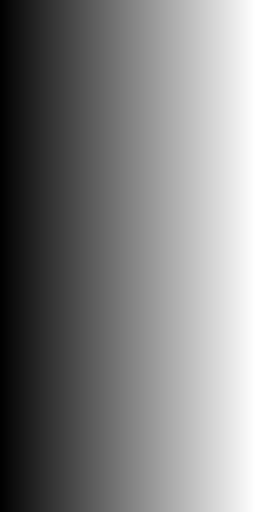

In [ ]:
array = get_gradient_3d(256, 512, (0, 0, 0), (255, 255, 255), (True, True, True))
I1 = Image.fromarray(np.uint8(array))
I1

<ipython-input-90-9f3fb224e2af>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)


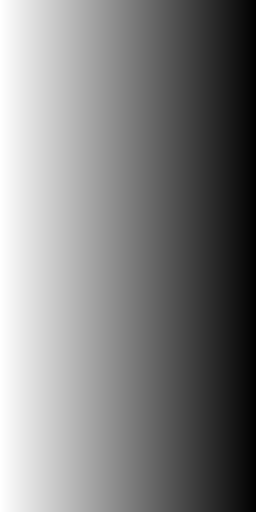

In [ ]:
array = get_gradient_3d(256, 512, (255, 255, 255), (0, 0, 0), (True, True, True))
I2 = Image.fromarray(np.uint8(array))
I2

In [ ]:
type(I1)

PIL.Image.Image

In [ ]:
type(I2)

PIL.Image.Image

Getting images from urls and then saving it

In [ ]:
img_url = 'https://images.pexels.com/photos/46251/sumatran-tiger-tiger-big-cat-stripes-46251.jpeg?cs=srgb&dl=pexels-pixabay-46251.jpghttps://images.pexels.com/photos/46251/sumatran-tiger-tiger-big-cat-stripes-46251.jpeg?cs=srgb&dl=pexels-pixabay-46251.jpg'
img_name = img_url.split('/')[-1]
img_name

'sumatran-tiger-tiger-big-cat-stripes-46251.jpeg?cs=srgb&dl=pexels-pixabay-46251.jpg'

In [ ]:
r = requests.get(img_url)
img = Image.open(BytesIO(r.content))
img.save('sample_data/'+ img_name, format = 'jpeg')

In [ ]:
img_path = "/content/sample_data/image 2.jpg"
img = cv2.imread(img_path) #Reading image
print(img.shape)

(768, 1360, 3)


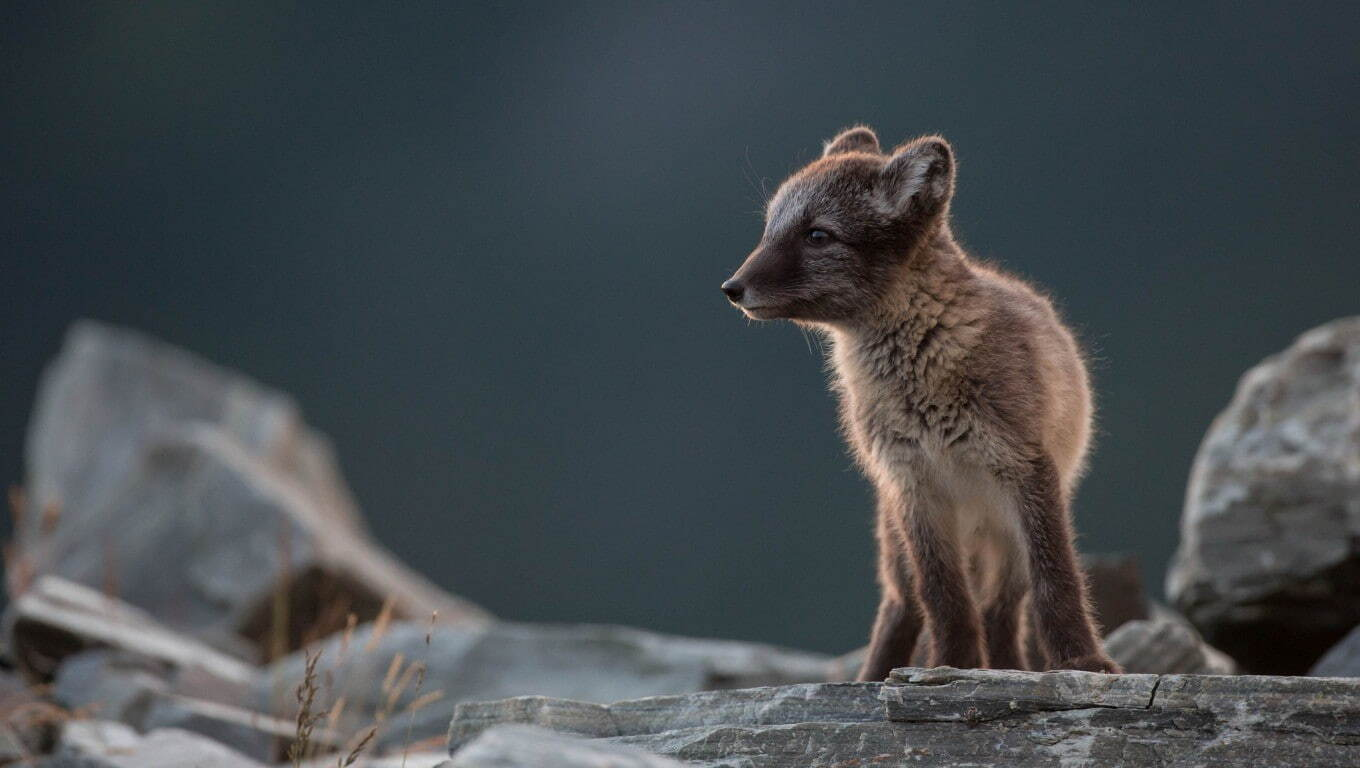

In [ ]:
cv2_imshow(img)

In [ ]:
height, width, channels = img.shape

Resizing the image

In [ ]:
img = cv2.resize(img, (512, 512))
#, None, scale, scale)
img.shape

(512, 512, 3)

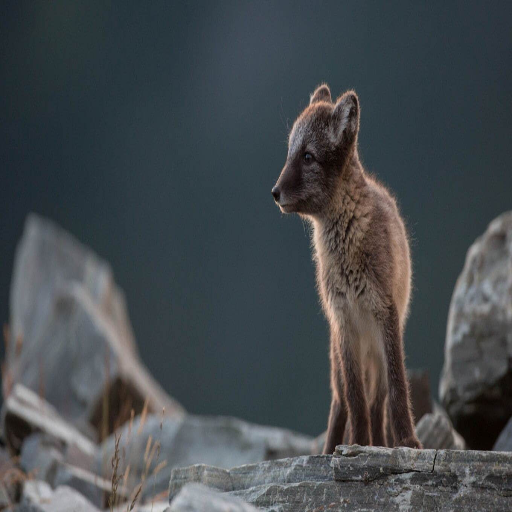

In [ ]:
cv2_imshow(img)

Converting the image from array to PIL as an input for the model

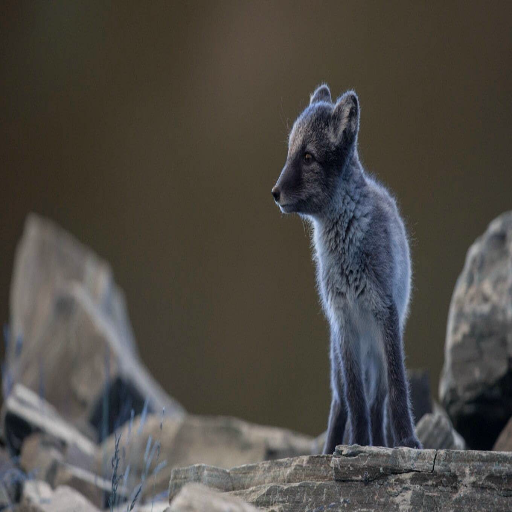

In [ ]:
img2 = Image.fromarray(img)
img2

Stacking the gradient images together to use as a masked image

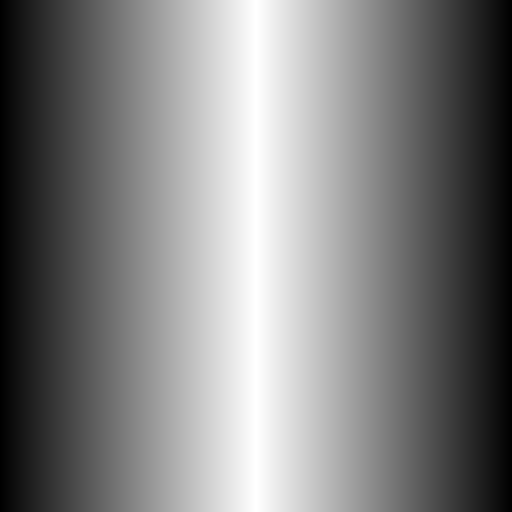

In [ ]:
#stacking the black and white images together
masked = np.hstack((I1, I2))
cv2_imshow(masked)

In [ ]:
masked.shape

(512, 512, 3)

In [ ]:
type(masked)

PIL.Image.Image

Converting the masked image from array to PIL image

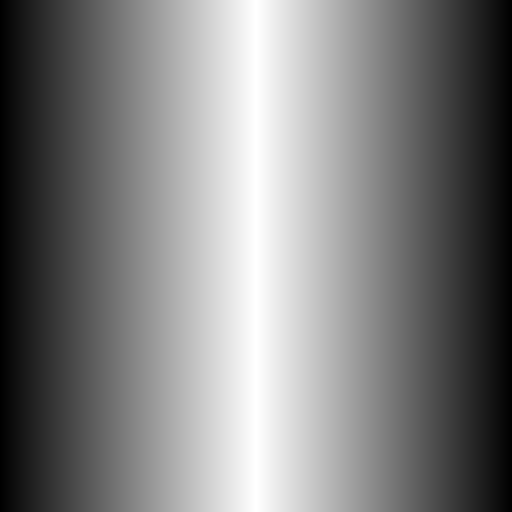

In [ ]:
masked = Image.fromarray(masked)
masked

In [ ]:
type(masked)

PIL.Image.Image

In [ ]:
type(img2)

PIL.Image.Image

Defining the pipeline of the model and generating the result image

vae/diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

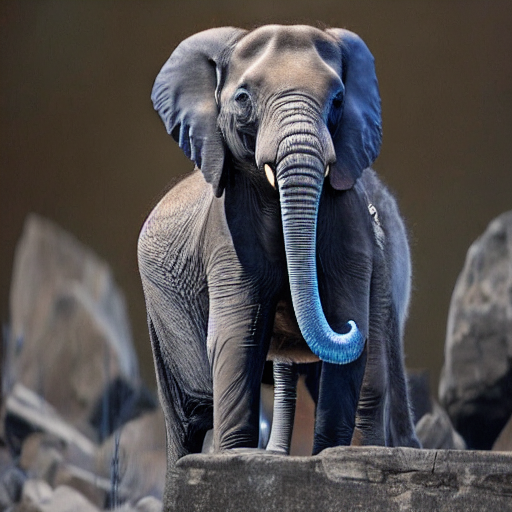

In [ ]:
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "an elephant standing in a happy mood, morning, 4k resolution"
image = pipe(prompt=prompt, image=img2, mask_image=masked).images[0]
image

Converting the output image from PIL to array again

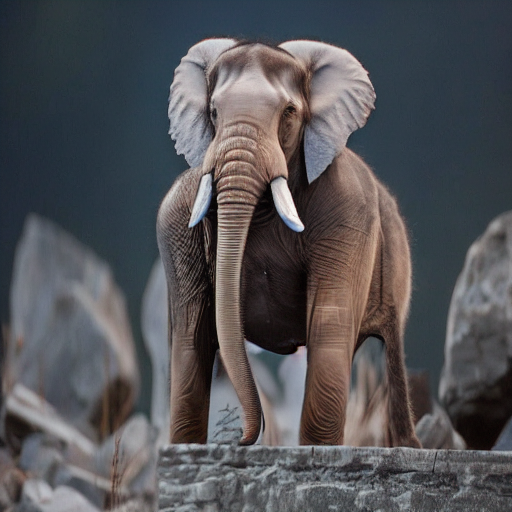

In [ ]:
#converting the PIL image back to numpy array image
img3 = np.array(image)
cv2_imshow(img3)

Resizing the resultant image back to the size of the original image

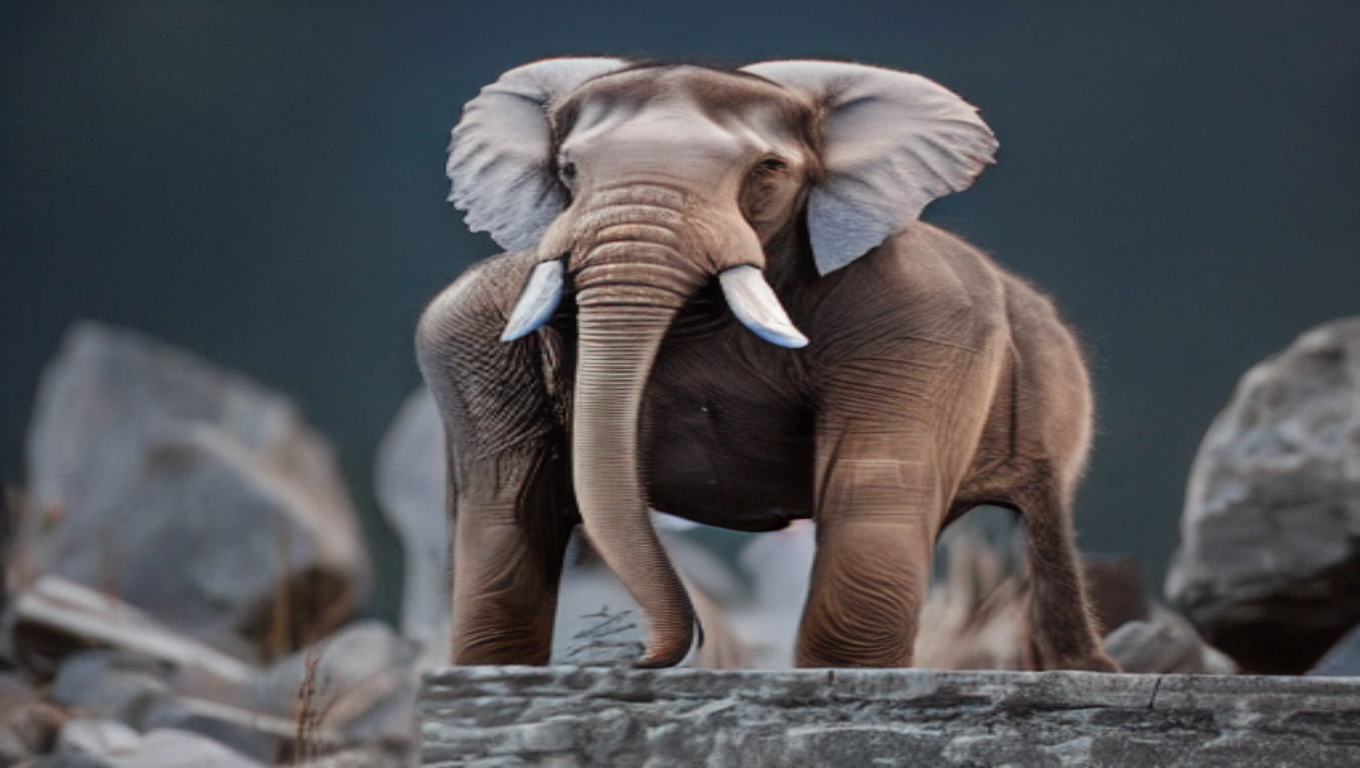

In [ ]:
result = cv2.resize(img3,(width, height))
cv2_imshow(result)